# Intro to Networkx and GerryChain
@author: scannon, with edits by eveomett <br>
Math of Political Districting, Claremont McKenna College, Fall 2024 <br>
Introduction to graphs & partitions with networkx and gerrychain

### Import necessary packages

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
import geopandas as gpd
import gerrychain   
from gerrychain import Graph, Partition, GeographicPartition
from gerrychain.tree import recursive_tree_part

## Section 1: Networkx

Main python class for working with graphs: documentation at [https://networkx.org/](https://networkx.org/)

You can build graphs node-by-node and edge-by-edge, see example.py/example.ipynb <br>
(In this class, we'll build graphs from real-world data)

We can also make special types of graphs, such as a grid graph (will use as an example) <br>
Other types of graphs can be found at [https://networkx.org/documentation/networkx-1.9/reference/generators.html](https://networkx.org/documentation/networkx-1.9/reference/generators.html)

A drawing of our grid graph:


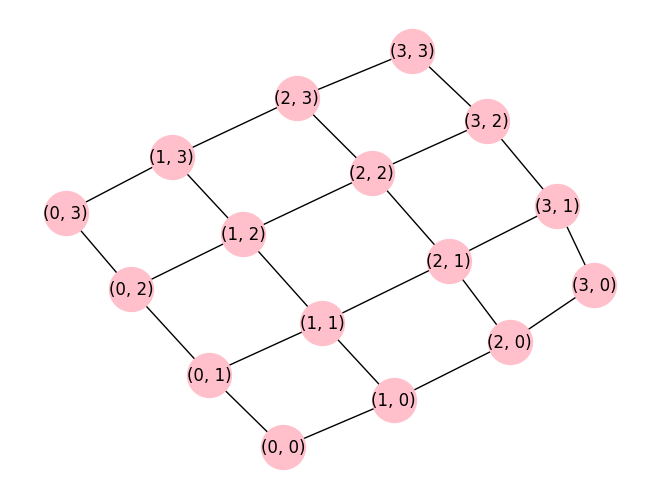

In [3]:
grid = nx.grid_graph([4,4]) # this makes a 4 x 4 grid graph 

print("A drawing of our grid graph:")




When drawing, positions are chosen automatically<br>
We can also specify the positions of the nodes manually (for example, using latitutde/longitude) <br>
You can find more drawing options at [https://networkx.org/documentation/stable/reference/drawing.html](https://networkx.org/documentation/stable/reference/drawing.html)


Sometimes we need to access nodes or edges from a graph we've imported.
 <br>
`grid.nodes()` returns a list of all nodes in the graph<br>
`grid.edges()` returns a list of all edges in the graph<br>


List of Nodes:  [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Number of Edges:  24


We can check whether a graph is connected. <br>
`nx.is_connected(graph)` returns true if graph connected, false otherwise

True

We can create an *induced subgraph*.  <br>
`nx.subgraph(graph, list_of_nodes)` returns a new networkx graph that contains all nodes in list_of_nodes and all edges between them 
<br>
(In grid graphs, the 'names' of nodes are ordered pairs; this isn't the case in other graphs)

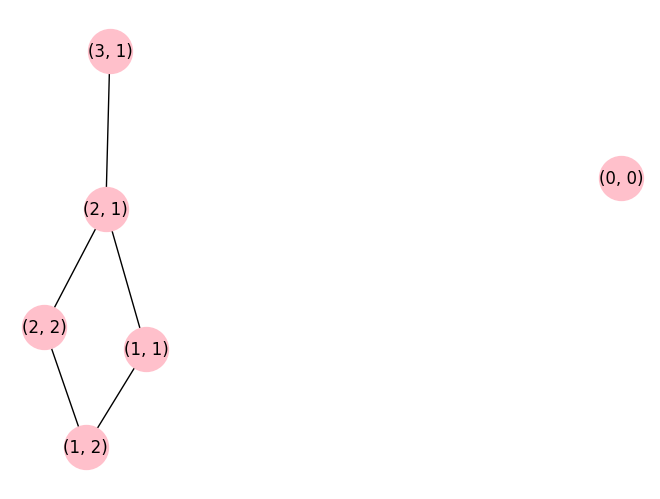

False

### Districting plans: a dictionary on nodes
Let's make a plan where each node's district is its x-coordinate

{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 1, (1, 1): 1, (1, 2): 1, (1, 3): 1, (2, 0): 2, (2, 1): 2, (2, 2): 2, (2, 3): 2, (3, 0): 3, (3, 1): 3, (3, 2): 3, (3, 3): 3}


We can visualize the districts by coloring the nodes within a district by the same color. <br>
Here we use `nx.draw()` to color: specify color by giving a list.

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]


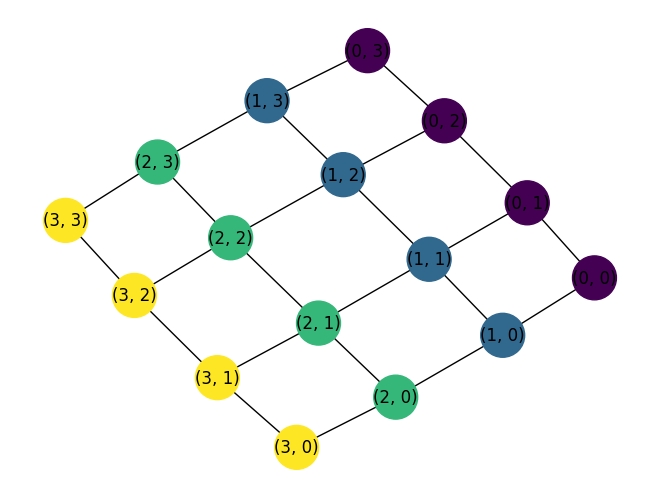

In [63]:
# Make a list of the colors each node should have

# Plot graph with these colors for nodes


Here's another districting plan

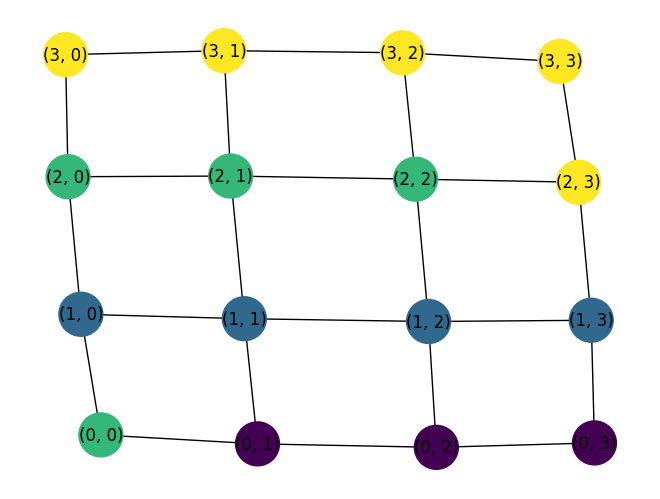

The one above looks funny: the districts are not all connected. <br>
Let's verify that:

Is district  0 connected?  True
Is district  1 connected?  True
Is district  2 connected?  False
Is district  3 connected?  True


### Cut edges can be used as a compactness score.  
Below we count the cut edges.  Note that `e[0]` and `e[1]` access the endpoints of each edge.

In [21]:
#Let's go back to our original districitng plan
distplan = {v:v[0] for v in grid.nodes()}

# Counting cutedges
cutedges = 0



print("Number of cutedges in distplan: ", cutedges)

Number of cutedges in distplan:  12


 ### Accessing attributes to nodes

Let's first create random populations for each node and add to graph<br>
(Shouldn't need to do this; our graphs will come with attributes from real world data)

In [22]:
np.random.seed(123456)
population_dict = {v:random.randint(100) for v in grid.nodes()}
nx.set_node_attributes(grid, population_dict, "population")

Access all the populations at once

[((0, 0), {'population': 65}), ((0, 1), {'population': 49}), ((0, 2), {'population': 56}), ((0, 3), {'population': 43}), ((1, 0), {'population': 43}), ((1, 1), {'population': 91}), ((1, 2), {'population': 32}), ((1, 3), {'population': 87}), ((2, 0), {'population': 36}), ((2, 1), {'population': 8}), ((2, 2), {'population': 74}), ((2, 3), {'population': 10}), ((3, 0), {'population': 12}), ((3, 1), {'population': 75}), ((3, 2), {'population': 20}), ((3, 3), {'population': 47})]


Access the populations of each node individually

Population of  (0, 0) :  65
Population of  (0, 1) :  49
Population of  (0, 2) :  56
Population of  (0, 3) :  43
Population of  (1, 0) :  43
Population of  (1, 1) :  91
Population of  (1, 2) :  32
Population of  (1, 3) :  87
Population of  (2, 0) :  36
Population of  (2, 1) :  8
Population of  (2, 2) :  74
Population of  (2, 3) :  10
Population of  (3, 0) :  12
Population of  (3, 1) :  75
Population of  (3, 2) :  20
Population of  (3, 3) :  47


# Section 2: Graphs and Partitions in Gerrychain


<br>
Gerrychain has a Graph class, that is based on a networkx graph<br>
Gerrychain has methods to read a graph in from a .json file or construct a graph from a shapefile<br>
<br>
Note that there are more dual graphs at: http://data.mggg.org.s3-website.us-east-2.amazonaws.com/dual-graphs/ if you'd like to play with those. <br>
Caution:  have not been carefully checked/vetted/investigated <br>
Maine - have different total populations on BGs and VTDs
<br>

### Pennsylvania Example
Let's create a dual graph of Pennsylvania's voting tabulation districts using a json. <br>
Now we can check whether the graph is planar, connected, etc. <br>
Note that this is an example of a non-planar dual graph! 

In [4]:
pa_graph = Graph.from_json("E:/Math 195 Fall 2024/PA.json")
print("Is this dual graph connected? ")
print("Is this dual graph planar? ")
print("Number of Nodes: ")
print("Number of Edges: ")

Is this dual graph connected?  True
Is this dual graph planar?  False
Number of Nodes:  9255
Number of Edges:  25721


Note that drawing the dual graph isn't that useful with this many nodes.  (It also takes a minute).

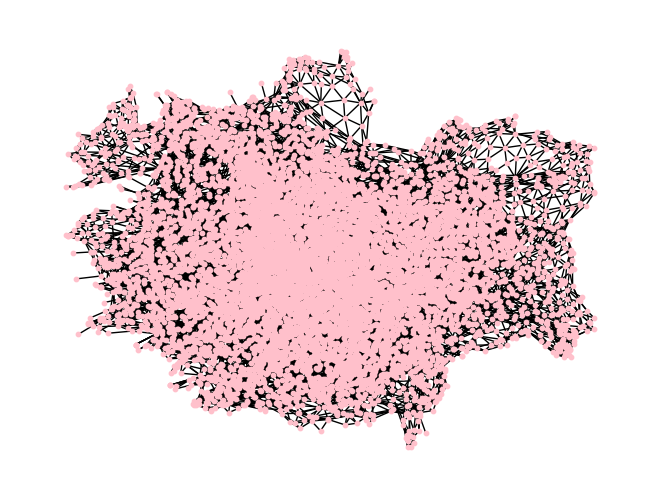

In [5]:
plt.figure() 
nx.draw(pa_graph, node_size = 10,  node_color = "pink")
plt.show()

What information is there on the nodes? 

dict_keys(['boundary_node', 'boundary_perim', 'area', 'STATEFP10', 'COUNTYFP10', 'VTDST10', 'GEOID10', 'VTDI10', 'NAME10', 'NAMELSAD10', 'LSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'ATG12D', 'ATG12R', 'GOV10D', 'GOV10R', 'PRES12D', 'PRES12O', 'PRES12R', 'SEN10D', 'SEN10R', 'T16ATGD', 'T16ATGR', 'T16PRESD', 'T16PRESOTH', 'T16PRESR', 'T16SEND', 'T16SENR', 'USS12D', 'USS12R', 'REMEDIAL', 'GOV', 'TS', 'CD_2011', 'SEND', 'HDIST', '538DEM', '538GOP', '538CMPCT', 'GOV14D', 'GOV14R'])



<br>
'TOTPOP': Total population according to the 2010 census<br>
'SEN10D': Number of votes for Democratic candidate in 2010 Senate race<br>
'ATG12R' : Number of votes for Republican candidate in 2012 Attorney General race <br>
'HVAP': Hispanic voting-age population according to the 2010 census<br>
'NH_AMIN': Non-Hispanic American Indian and Alaska Native Population, according to the 2010 census<br>
'INTPTLAT10': Lattitude of an point inside the VTD<br>
'INTPTLON10': Latitude of a point inside the VTD<br>
'CD_2011': District Assignment for Congressional Districts in the 2011 plan<br>
etc.<br>


Let's get total population

In [28]:
# Population at node 0 (Note nodes are 'named' 0, 1, 2, 3, etc.)


# List of populations at each node


# Total population

print("Total Population: ")

1915
Total Population:  12702379


Let's draw the vertices at a location given by their latitude/longitude, colored by 2011 district

In [ ]:
# List of node colors


In [40]:
# Dictionary of node positions
# Longitude of node 0: 


# Format needed for positions: dictionary where key is v and value is ordered pair (x-coord, y-coord)
# Location for node 0 


# Getting these values for every node




{0: (-80.4865792, 41.1564874), 1: (-80.0382865, 41.6745788), 2: (-79.8467004, 41.7499682), 3: (-80.4562835, 41.8099591), 4: (-79.8363351, 41.8113731), 5: (-80.0200345, 41.8298508), 6: (-79.7610709, 41.7389058), 7: (-80.2128013, 41.8010235), 8: (-80.0771844, 41.5501464), 9: (-80.320099, 41.5296451), 10: (-80.1481491, 41.6290628), 11: (-80.1449264, 41.6346809), 12: (-80.1578433, 41.6344853), 13: (-80.0604792, 41.6227245), 14: (-80.1142358, 41.5132083), 15: (-80.2291024, 41.5285528), 16: (-80.1534879, 41.6446717), 17: (-80.1636132, 41.6488337), 18: (-80.4693239, 41.6140037), 19: (-79.6779728, 41.659123), 20: (-79.6950801, 41.8156259), 21: (-79.9641112, 41.6246379), 22: (-79.6858628, 41.7359296), 23: (-80.3295171, 41.6062514), 24: (-80.1308514, 41.7145295), 25: (-80.4485802, 41.5355011), 26: (-79.681817, 41.8232371), 27: (-80.0469859, 41.5192017), 28: (-80.4588156, 41.6997847), 29: (-80.36846, 41.7569271), 30: (-80.2041359, 41.7108207), 31: (-80.1431859, 41.6396406), 32: (-80.4302778, 41.6

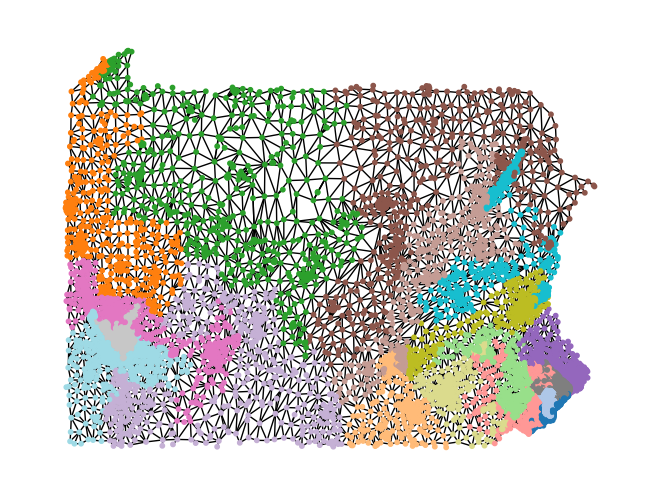

In [53]:
#Drawing a figure with these colors and locations
# cmap = "tab20" changes the color scheme so that districts are easier to see
plt.figure()
nx.draw(pa_graph, node_size = 10,  node_color = node_colors, cmap="tab20")
plt.show()

## Importing From Shapefiles

Some data, but not all, has already been turned into dual graphs and stored in .json format<br>
But, this is not always the case <br>
Can also import data directly from shapefiles (we'll learn a lot more about shapefiles later)<br> 
You may want to do this for your miniproject<br>
Shapefiles for many states at: https://github.com/mggg-states <br>
Use gerrychain's `Graph.from_file()`

In [45]:
graph = Graph.from_file("E:/Math 195 Fall 2024/PA/PA.shp")

Should get the same graph. Check has same number of nodes and same total population. 


In [46]:
print("Total Nodes: ")

print("Total Population: ")

Total Nodes:  9255
Total Population:  12702379


Note that the graph nodes have one additional attribute: ``` `geometry` ```.  This is because we got it from a shapefile.

dict_keys(['boundary_node', 'boundary_perim', 'area', 'STATEFP10', 'COUNTYFP10', 'VTDST10', 'GEOID10', 'VTDI10', 'NAME10', 'NAMELSAD10', 'LSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'ATG12D', 'ATG12R', 'GOV10D', 'GOV10R', 'PRES12D', 'PRES12O', 'PRES12R', 'SEN10D', 'SEN10R', 'T16ATGD', 'T16ATGR', 'T16PRESD', 'T16PRESOTH', 'T16PRESR', 'T16SEND', 'T16SENR', 'USS12D', 'USS12R', 'REMEDIAL', 'GOV', 'TS', 'CD_2011', 'SEND', 'HDIST', '538DEM', '538GOP', '538CMPCT', 'GOV14D', 'GOV14R', 'geometry'])


Can also read shapefiles into geodataframes rather than graphs (More on this later) <br>
This lets you do a lot of additional things, such as visualizing the map (and more) <br>
This data is from the map that has the *Goofy Kicking Donald Duck* district.   <br>

<Axes: >

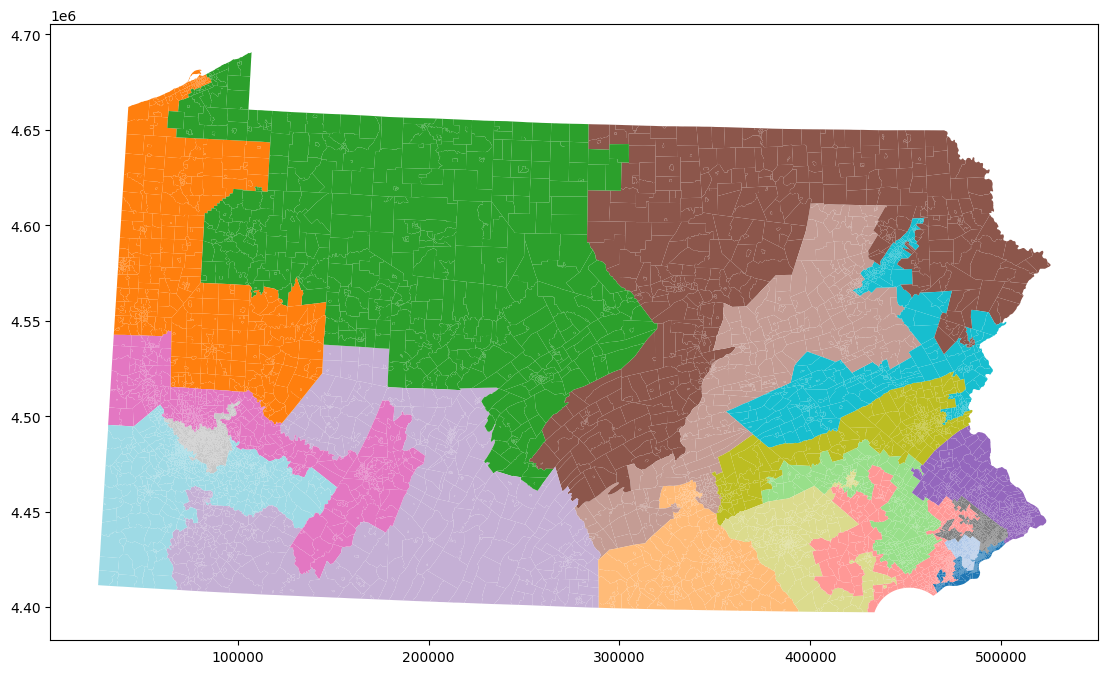

In [49]:
# Read shapefile data into a geo data frame, rather than creating a graph

# Make a districting plan, using the "CD_2011" column

# Draw the map 


### Make an initial districting plan using recursive_tree_part

This makes a random districting plan. This plan will be the starting point for random walks that build our ensemble<br>
Arguments in the recursive_tree_part function: 
```
pa_graph = the dual graph we're using
range(num_dist) = how many districts to make
ideal_pop = target population within each district
'TOTPOP' = what node attribute you should use for population
0.02 = tolerance for deviation from ideal pop
10 = number of times you try one step of the process before giving up (we usually don't need to worry about this)
```


In [51]:
 # in the example plan we drew, there were 18 districts; as of 2020, PA only has 17




In [52]:
# This initial plan is a dictionary
# node:district
# Node 8551 is in district 0, etc. 


{8551: 0, 8552: 0, 8222: 0, 8562: 0, 8295: 0, 8296: 0, 8330: 0, 8333: 0, 8335: 0, 8337: 0, 8346: 0, 219: 0, 6373: 0, 6377: 0, 6391: 0, 257: 0, 8450: 0, 8451: 0, 6407: 0, 8456: 0, 8457: 0, 8458: 0, 6425: 0, 8496: 0, 8497: 0, 8610: 0, 8611: 0, 8612: 0, 8613: 0, 2389: 0, 2390: 0, 2391: 0, 2392: 0, 2393: 0, 2394: 0, 2395: 0, 2396: 0, 2397: 0, 2398: 0, 2399: 0, 2400: 0, 2401: 0, 2402: 0, 2403: 0, 2404: 0, 2405: 0, 2406: 0, 2407: 0, 2408: 0, 2409: 0, 8554: 0, 8555: 0, 8556: 0, 8557: 0, 2413: 0, 2415: 0, 2416: 0, 2417: 0, 2418: 0, 2419: 0, 2420: 0, 2421: 0, 2422: 0, 2423: 0, 2424: 0, 2425: 0, 2426: 0, 2427: 0, 2428: 0, 2429: 0, 2430: 0, 2431: 0, 2432: 0, 2433: 0, 2434: 0, 2435: 0, 2436: 0, 2437: 0, 2438: 0, 2439: 0, 2440: 0, 2441: 0, 2442: 0, 2443: 0, 2444: 0, 2445: 0, 2446: 0, 2447: 0, 2448: 0, 2449: 0, 2450: 0, 2451: 0, 2452: 0, 2453: 0, 2454: 0, 2455: 0, 2456: 0, 2457: 0, 2458: 0, 2459: 0, 2460: 0, 2461: 0, 2462: 0, 2463: 0, 2464: 0, 2465: 0, 2466: 0, 2467: 0, 2468: 0, 2469: 0, 2470: 0, 24

We can draw this districting plan like we did above

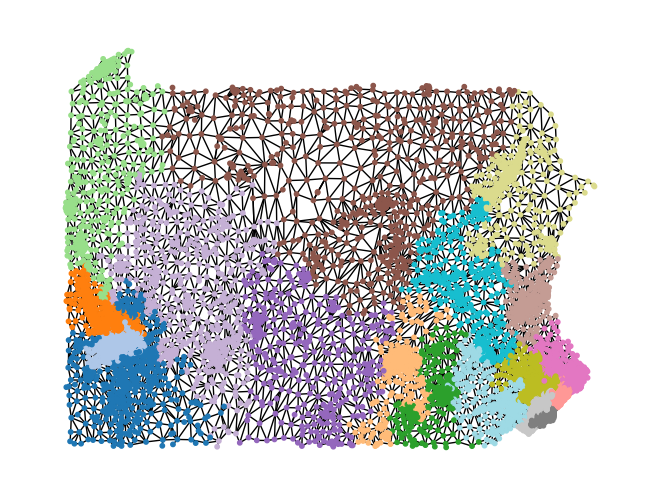

In [55]:
plt.figure()
nx.draw(pa_graph, node_size = 10,  node_color = "pink", pos = node_locations, cmap="tab20")
plt.show()

We can count the cut edges of the partition

In [56]:
cutedges = 0

print("Number of cutedges in initial_plan: ", cutedges)

Number of cutedges in initial_plan:  1730


We can see how this compares to the number of cutedges in the 2011 plan. <br>
(Need to access differently - 2011 plan is a node attribute, rather than a separate deictionary)

In [58]:
cutedges = 0 

print("Number of cutedges in CD_2011 Plan: ", cutedges)

Number of cutedges in CD_2011 Plan:  2367


Our random initial plan has fewer cutedges than the 2011 plan!

 Find the population of each district:

In [59]:

    
print("Populations of Districts: ")

Populations of Districts:  [714410, 704395, 702880, 713552, 702292, 695720, 702383, 707172, 706140, 705305, 712440, 703331, 708911, 700478, 694931, 718381, 703264, 706394]


# Activity
## 1. Networkx
a.  Make a 5x5 grid graph


b. Make a districting plan for it with 5 districts (manually or with some other method)



c. Check whether your districting plan has connected districts

d. Draw your districting plan, with colors for the nodes that show the districts

## 2. Gerrychain

a. Pick a different state and download a (connected) dual graph from http://data.mggg.org.s3-website.us-east-2.amazonaws.com/dual-graphs/ or a shapefile from https://github.com/mggg-states. 


b. Import your dual graph and see how many nodes and edges it has; double-check that it's connected

c. Find the total population in your state

d. Decide on a number of districts to use and calculate the ideal population per district 
(tip: if the number of districts is too large or the population tolerance is too small, recursive_tree_part can take a long time to run)

e. Use recursive_tree_part to make a districting plan.

f. Find the number of cutedges your districting plan has

## BONUS ACTIVITY 1

For both the distriting plan we created above for Pensylvania and the plan given by "CD_2011", sum up across districts the total Democratic votes in the 2016 presidential election and the total Republican votes in the 2016 presidential election ('T16PRESD', 'T16PRESR'). In each plan, how many districts have more Democratic votes and how many districts have more Repuiblican votes? 

## BONUS ACTIVITY 2
 
For the dual graph you chose, find out whether it has latitude/longitude at each vertex, and if so what those attributes are called (if it doesn't have latitutde/longitude, try another state). Draw your districting plan with the vertices at locations given by longitude/latitude